<a href="https://colab.research.google.com/github/jake321southall/football-data-analysis/blob/main/Football_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV, LinearRegression
from sklearn.model_selection import train_test_split
from pandas.api.types import is_numeric_dtype

import tensorflow as tf
from tensorflow	import keras

url = "https://raw.githubusercontent.com/tara-nguyen/english-premier-league-datasets-for-10-seasons/main/epldat10seasons/epl-allseasons-matchstats.csv"
df = pd.read_csv(url)


In [153]:
#Let's drop the columns we won't use
df.drop(columns = ['Referee', 'HomeTeam', 'AwayTeam'], inplace=True)
df = pd.get_dummies(df, columns = ['FullTime'])
df_num = df.drop(columns = ['Season', 'Date', 'Halftime'])
df_homewin = df_num.drop(columns = ['HomeGoals', 'AwayGoals', 'FullTime_Draw', 'FullTime_AwayWin'])

In [154]:
print(df_homewin.shape)
df_homewin.head()

(3800, 15)


,HomeGoalsHalftime,HomeShots,HomeShotsOnTarget,HomeCorners,HomeFouls,HomeYellowCards,HomeRedCards,AwayGoalsHalftime,AwayShots,AwayShotsOnTarget,AwayCorners,AwayFouls,AwayYellowCards,AwayRedCards,FullTime_HomeWin
0,2,23,11,16,15,1,0,0,12,2,7,15,2,0,1
1,1,7,2,1,19,2,0,0,17,12,3,14,1,0,1
2,0,13,9,4,12,1,0,0,12,7,8,13,3,0,0
3,2,18,13,3,10,1,0,0,10,4,1,10,0,0,1
4,1,6,2,3,13,3,1,0,13,7,6,10,3,0,0


In [155]:
X = df_homewin.iloc[:, 0:14]
y = df_homewin.iloc[:,-1]

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [157]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [158]:
#Creating a function to design the initial model with no regularisation

def build_model():
  model = keras.Sequential([
      keras.layers.Dense(16, activation='relu'),
      keras.layers.Dense(16, activation='relu'), 
      keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [159]:
my_model = build_model()
history_init = my_model.fit(X_train_scaled, y_train, epochs=200, batch_size=256, validation_split=0.2, verbose=0)
history_init_dict = history_init.history

In [160]:
len(X_train_scaled)/5

608.0

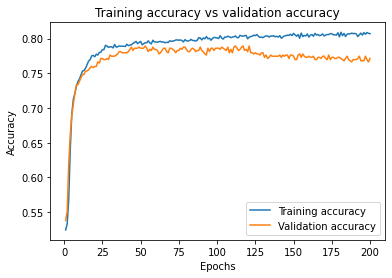

In [161]:
#Plotting training accuracy vs validation accuracy

init_training_acc_values = history_init_dict['accuracy']
init_val_acc_values = history_init_dict['val_accuracy']
epochs = range(1, len(init_training_acc_values)+1)
plt.plot(epochs, init_training_acc_values, label='Training accuracy')
plt.plot(epochs, init_val_acc_values, label='Validation accuracy')
plt.title('Training accuracy vs validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

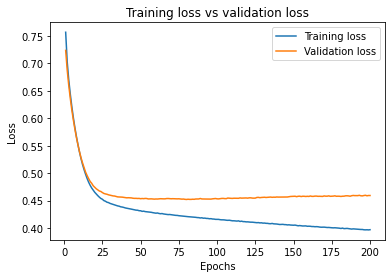

In [162]:
#Plotting training loss vs validation loss
init_training_loss_values = history_init_dict['loss']
init_val_loss_values = history_init_dict['val_loss']
epochs = range(1, len(init_training_loss_values)+1)
plt.plot(epochs, init_training_loss_values, label='Training loss')
plt.plot(epochs, init_val_loss_values, label='Validation loss')
plt.title('Training loss vs validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [163]:
# Creating a NN model with regularistion using dropout layers and early stopping

def build_reg_model():
  model = keras.Sequential([
      keras.layers.Dense(16, activation='relu'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(16, activation='relu'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [166]:
my_final_model = build_reg_model()
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
history_final = my_final_model.fit(X_train_scaled, y_train, epochs=200, batch_size=256, validation_split=0.2, verbose=0, callbacks=[es])
history_final_dict = history_final.history

Epoch 169: early stopping


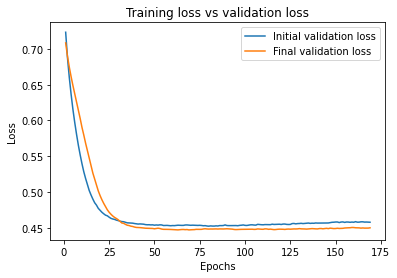

In [168]:
# Plotting validation metrics with and without regularistion
final_val_loss_values = history_final_dict['val_loss']
epochs = range(1, len(final_val_loss_values)+1)
plt.plot(epochs, init_val_loss_values[:len(final_val_loss_values)], label='Initial validation loss')
plt.plot(epochs, final_val_loss_values, label='Final validation loss')
plt.title('Training loss vs validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [169]:
# Computing the test loss and test accuracy of initial and final NN models
initial_test_loss, initial_test_acc = my_model.evaluate(X_test_scaled, y_test, verbose = 0)
final_test_loss, final_test_acc = my_final_model.evaluate(X_test_scaled, y_test, verbose = 0)

In [170]:
print(initial_test_acc, final_test_acc)

0.7815789580345154 0.7657894492149353
